In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

#from sklearn.model_selection import train_test_split
#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [13]:
# Find the path to CSV file
csv_path = 'test.csv'
# Load data set which is provided by Kaggle
df = pd.read_csv(csv_path)
# Inspect first few rows of the data set
print(df.head())

                            md5hash  fitzpatrick_scale  fitzpatrick_centaur  \
0  0844ae634f0e6e7ef1f73c2aeecbae0e                  2                    2   
1  3b290d262098f761d719aa07cf36c040                  4                    3   
2  cf561d08ac46d0fda678bff6621005ee                  2                    3   
3  e6371069be05c6b0a95b4b3f1bacc9a5                  4                    3   
4  f76cddb37265f97508f159078dcc7e7c                  5                    5   

    qc  ddi_scale  
0  NaN         12  
1  NaN         34  
2  NaN         12  
3  NaN         34  
4  NaN         56  


In [26]:
# check data types of each column
print(df.info())

# check for missing values
print(df.isnull().sum())
# qc has 1198 missing values
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   md5hash              1227 non-null   object
 1   fitzpatrick_scale    1227 non-null   int64 
 2   fitzpatrick_centaur  1227 non-null   int64 
 3   qc                   29 non-null     object
 4   ddi_scale            1227 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 48.1+ KB
None
md5hash                   0
fitzpatrick_scale         0
fitzpatrick_centaur       0
qc                     1198
ddi_scale                 0
dtype: int64
       fitzpatrick_scale  fitzpatrick_centaur    ddi_scale
count        1227.000000          1227.000000  1227.000000
mean            2.565607             2.118989    23.864711
std             1.458359             1.528582    15.296566
min            -1.000000            -1.000000    -1.000000
25%             2.000000             1.000000  

In [18]:
# Find path to the folder that has the images
image_folder = 'test/test'
def load_preprocess_images(image_path, target_size=(128, 128)):
    image = cv2.imread(image_path)
    if image is None:
        # if an image in the folder is not
        raise FileNotFoundError(f"Image not found: {image_path}")
    image = cv2.resize(image, target_size)
    image = image / 255.0
    return image

In [19]:
# Load all images and the labels
X = []  # List to store images
y = []  # List to store labels

for index, row in df.iterrows():
    image_path = os.path.join(image_folder, row['md5hash'] + '.jpg')
    if os.path.exists(image_path):
        image = load_preprocess_images(image_path)
        X.append(image)
        y.append(row['ddi_scale'])  # Use 'ddi_scale' as the label
    else:
        print(f"Image not found: {image_path}")

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)


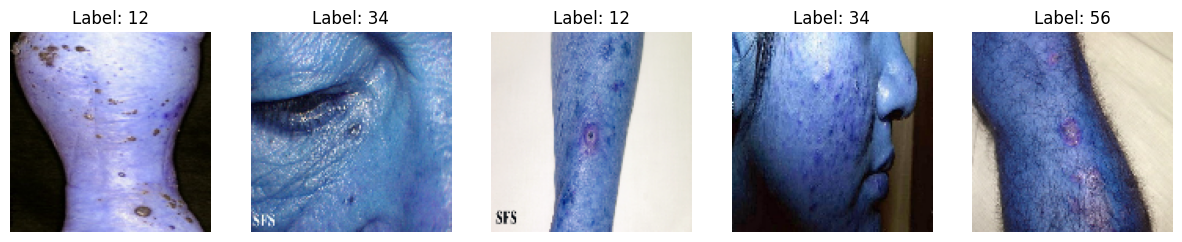

In [20]:
# test function to display images
def display_images(images, labels, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])  # Display the image
        plt.title(f"Label: {labels[i]}")  # Show the corresponding label
        plt.axis('off')  # Hide axes
    plt.show()

# Convert normalized images back to [0, 255] for display
X_display = (X * 255).astype(np.uint8)

# Display the first few images and their labels
display_images(X_display, y)